<a href="https://colab.research.google.com/github/mpurkeypile-usd/AAI590-Final_Project/blob/main/AAI590_Final_Project_MPurkeypile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matt Purkeypile  
AAI590 Capstone: Final Project  
August 2025  

# Breast Tumor Classification Using Quantum Neural Networks

## Setup and library loading

In [1]:
# AFTER THIS CELL FINISHES RUNNING, BE SURE TO RESTART THE SESSION
# (Easiest to just run this cell individually at first, then restart)
#
# the next few cells setting up the resources is based on the following:
# https://www.tensorflow.org/quantum/tutorials/hello_many_worlds
!pip install tensorflow==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully un

In [1]:
# AFTER THIS CELL FINISHES RUNNING, BE SURE TO RESTART THE SESSION
# (Easiest to just run this cell individually at first, then restart)
!pip install tensorflow-quantum==0.7.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.8
    Uninstalling protobuf-4.25.8:
      Successfully uninstalled protobuf-4.25.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you

In [1]:
# Should be able to run from this cell and below to run everything
# else all at once.

# Update package resources to account for version changes.
import importlib, pkg_resources

importlib.reload(pkg_resources)

/tmp/ipython-input-1-271731453.py:5: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import importlib, pkg_resources


<module 'pkg_resources' from '/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py'>

In [2]:
# for quantum computing
import tensorflow as tf
import tensorflow_quantum as tfq    # reference: https://www.tensorflow.org/quantum

import cirq                         # reference: https://quantumai.google/cirq/
import cirq_google
from cirq.contrib.svg import SVGCircuit
import sympy

In [3]:
# to load the data
from google.colab import drive

# standard libraries
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Data Cleaning

In [4]:
# first load the data
# note that the file is also in the github repo and could
# be moved into this location or pulled from there.
# original source of data:
# https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?resource=download
# downloaded June 2025
drive.mount('/content/gdrive')
DATASET_PATH = '/content/gdrive/My Drive/Colab Notebooks/breast-cancer.csv'
TARGET_COL = 'diagnosis'

raw_data = pd.read_csv(DATASET_PATH)

raw_data.describe()
print()
raw_data.info()
print()
raw_data.head()

Mounted at /content/gdrive

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# add in a new column for the diagnosis as a new binary
# variable: 1 (malignant, cancerous), 0 (benign, non-cancerous)
TARGET_COL_BINARY = 'diagnosis_binary'
raw_data[TARGET_COL_BINARY] = raw_data[TARGET_COL].apply(lambda x: 1 if x == 'M' else 0)

print(raw_data[TARGET_COL_BINARY].value_counts())
print(raw_data[TARGET_COL_BINARY].dtype)

diagnosis_binary
0    357
1    212
Name: count, dtype: int64
int64


In [6]:
# any missing values? (although can see above too)
raw_data.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


### Data cleaning summary
This data is pretty clean, so nothing really needs to be done to cleanup the data.

## Exploratory Data Analysis

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


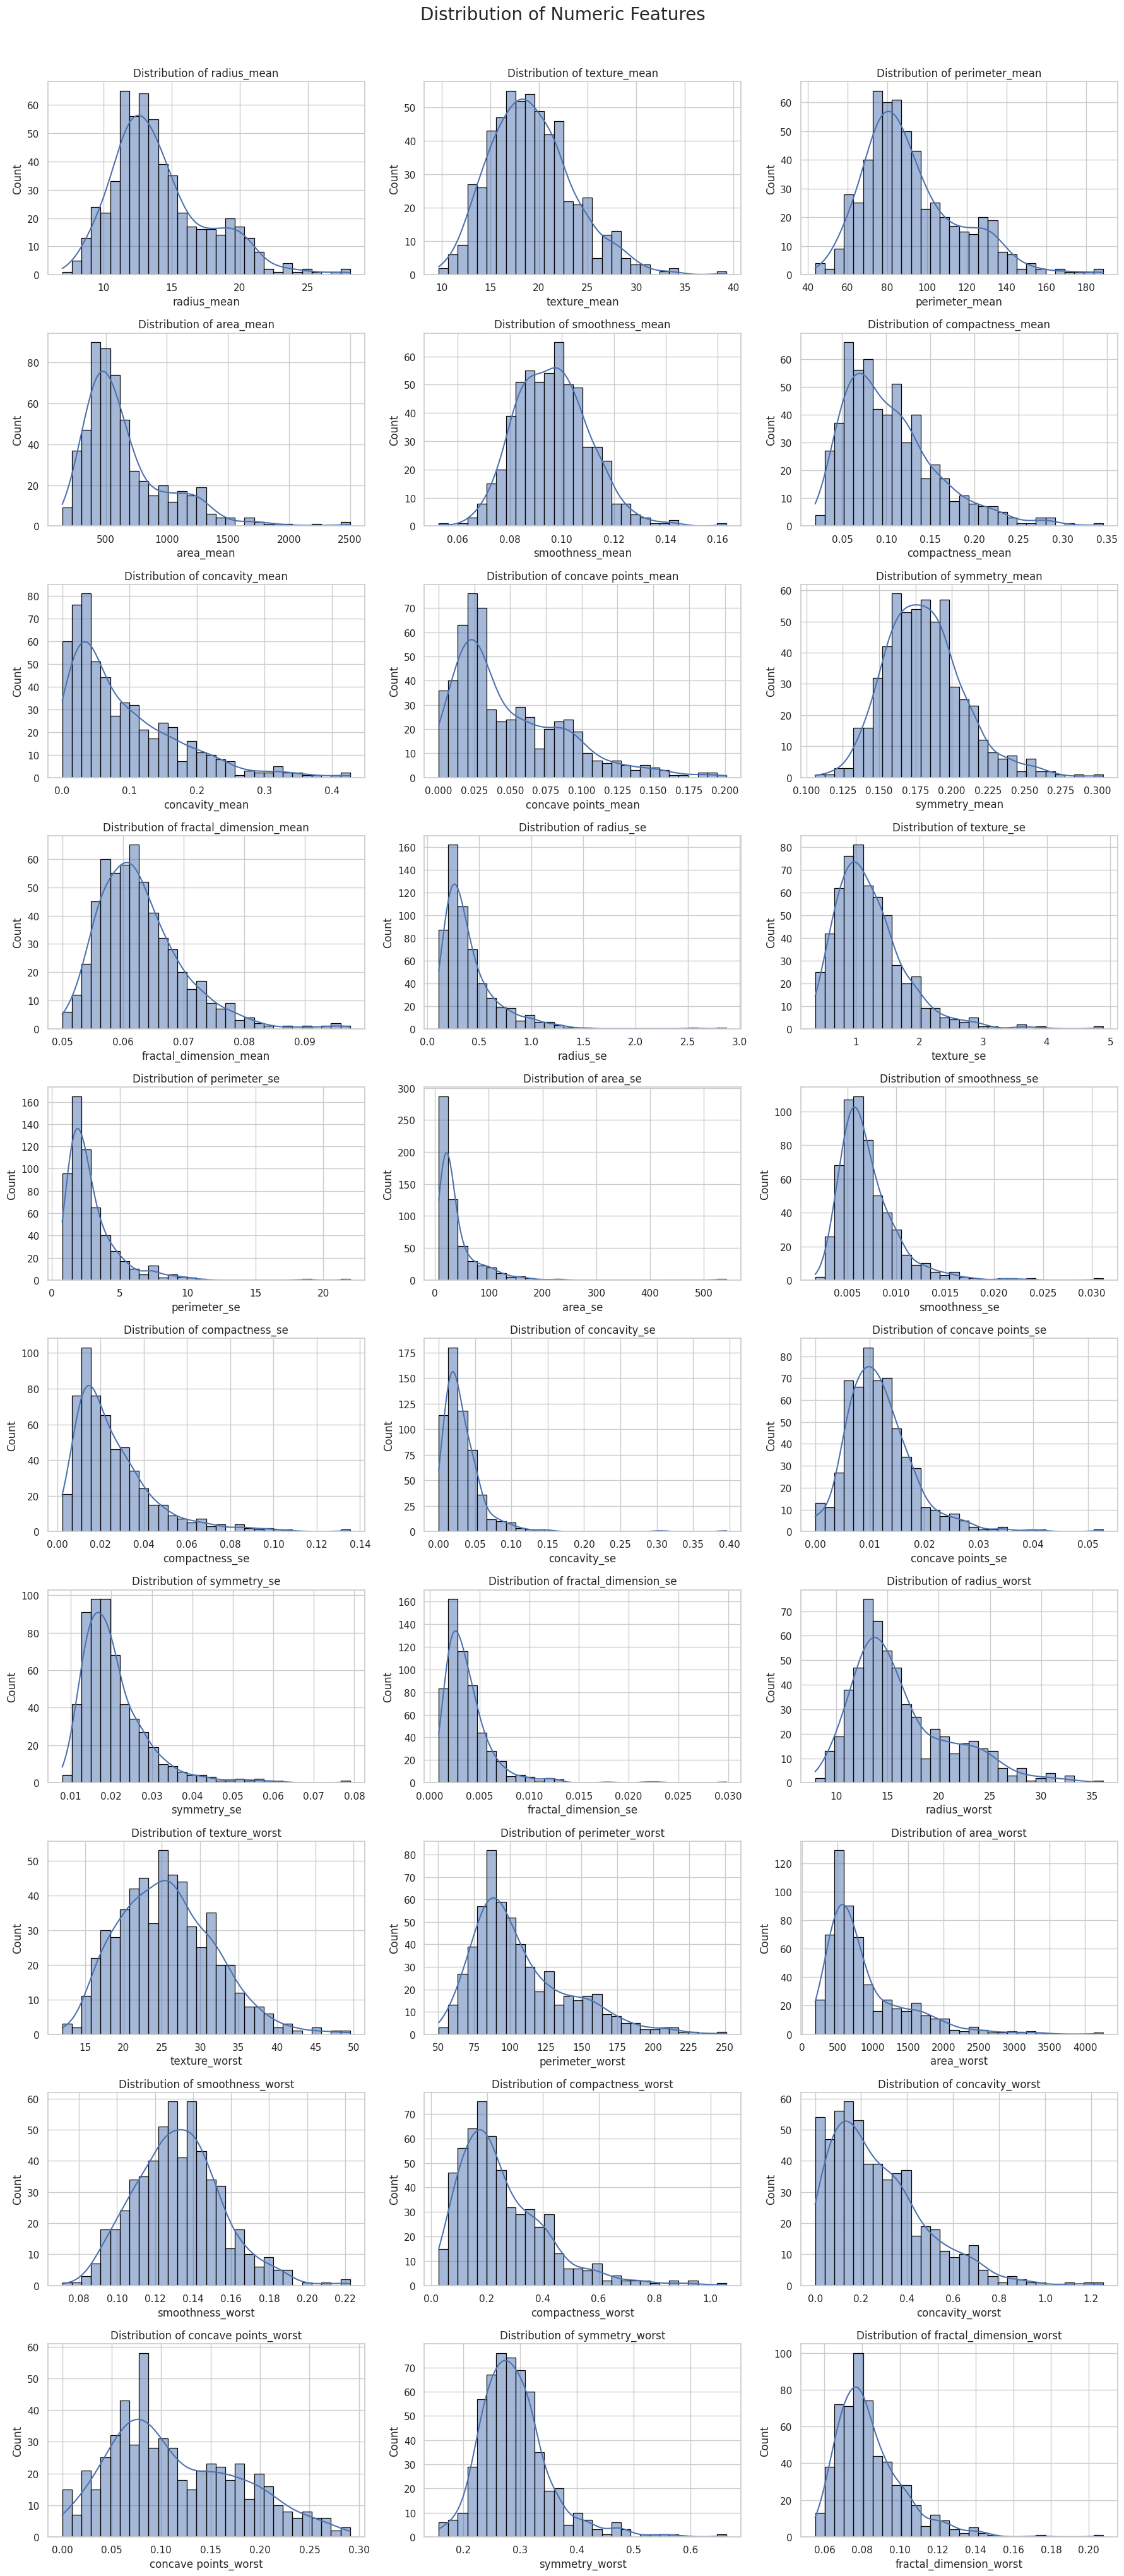

In [7]:
# based on my AAI540 final project
# Select numeric columns
numeric_cols = raw_data.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('id')
numeric_cols = numeric_cols.drop(TARGET_COL_BINARY)

print(numeric_cols)

# Set plot style
sns.set(style="whitegrid")

# Set up the grid
num_plots = len(numeric_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)
fig, axes = plt.subplots(rows, 3, figsize=(18, 4 * rows))
axes = axes.flatten()

# Plot distributions
for i, col in enumerate(numeric_cols):
    sns.histplot(raw_data[col], kde=True, ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distribution of Numeric Features", fontsize=20, y=1.02)
plt.show()

<Axes: xlabel='diagnosis', ylabel='Count'>

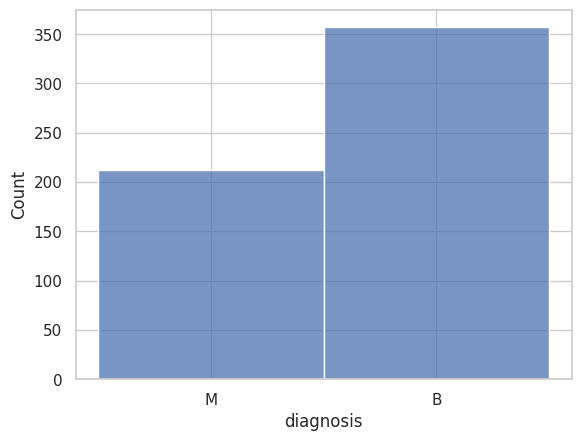

In [8]:
sns.histplot(raw_data[TARGET_COL])

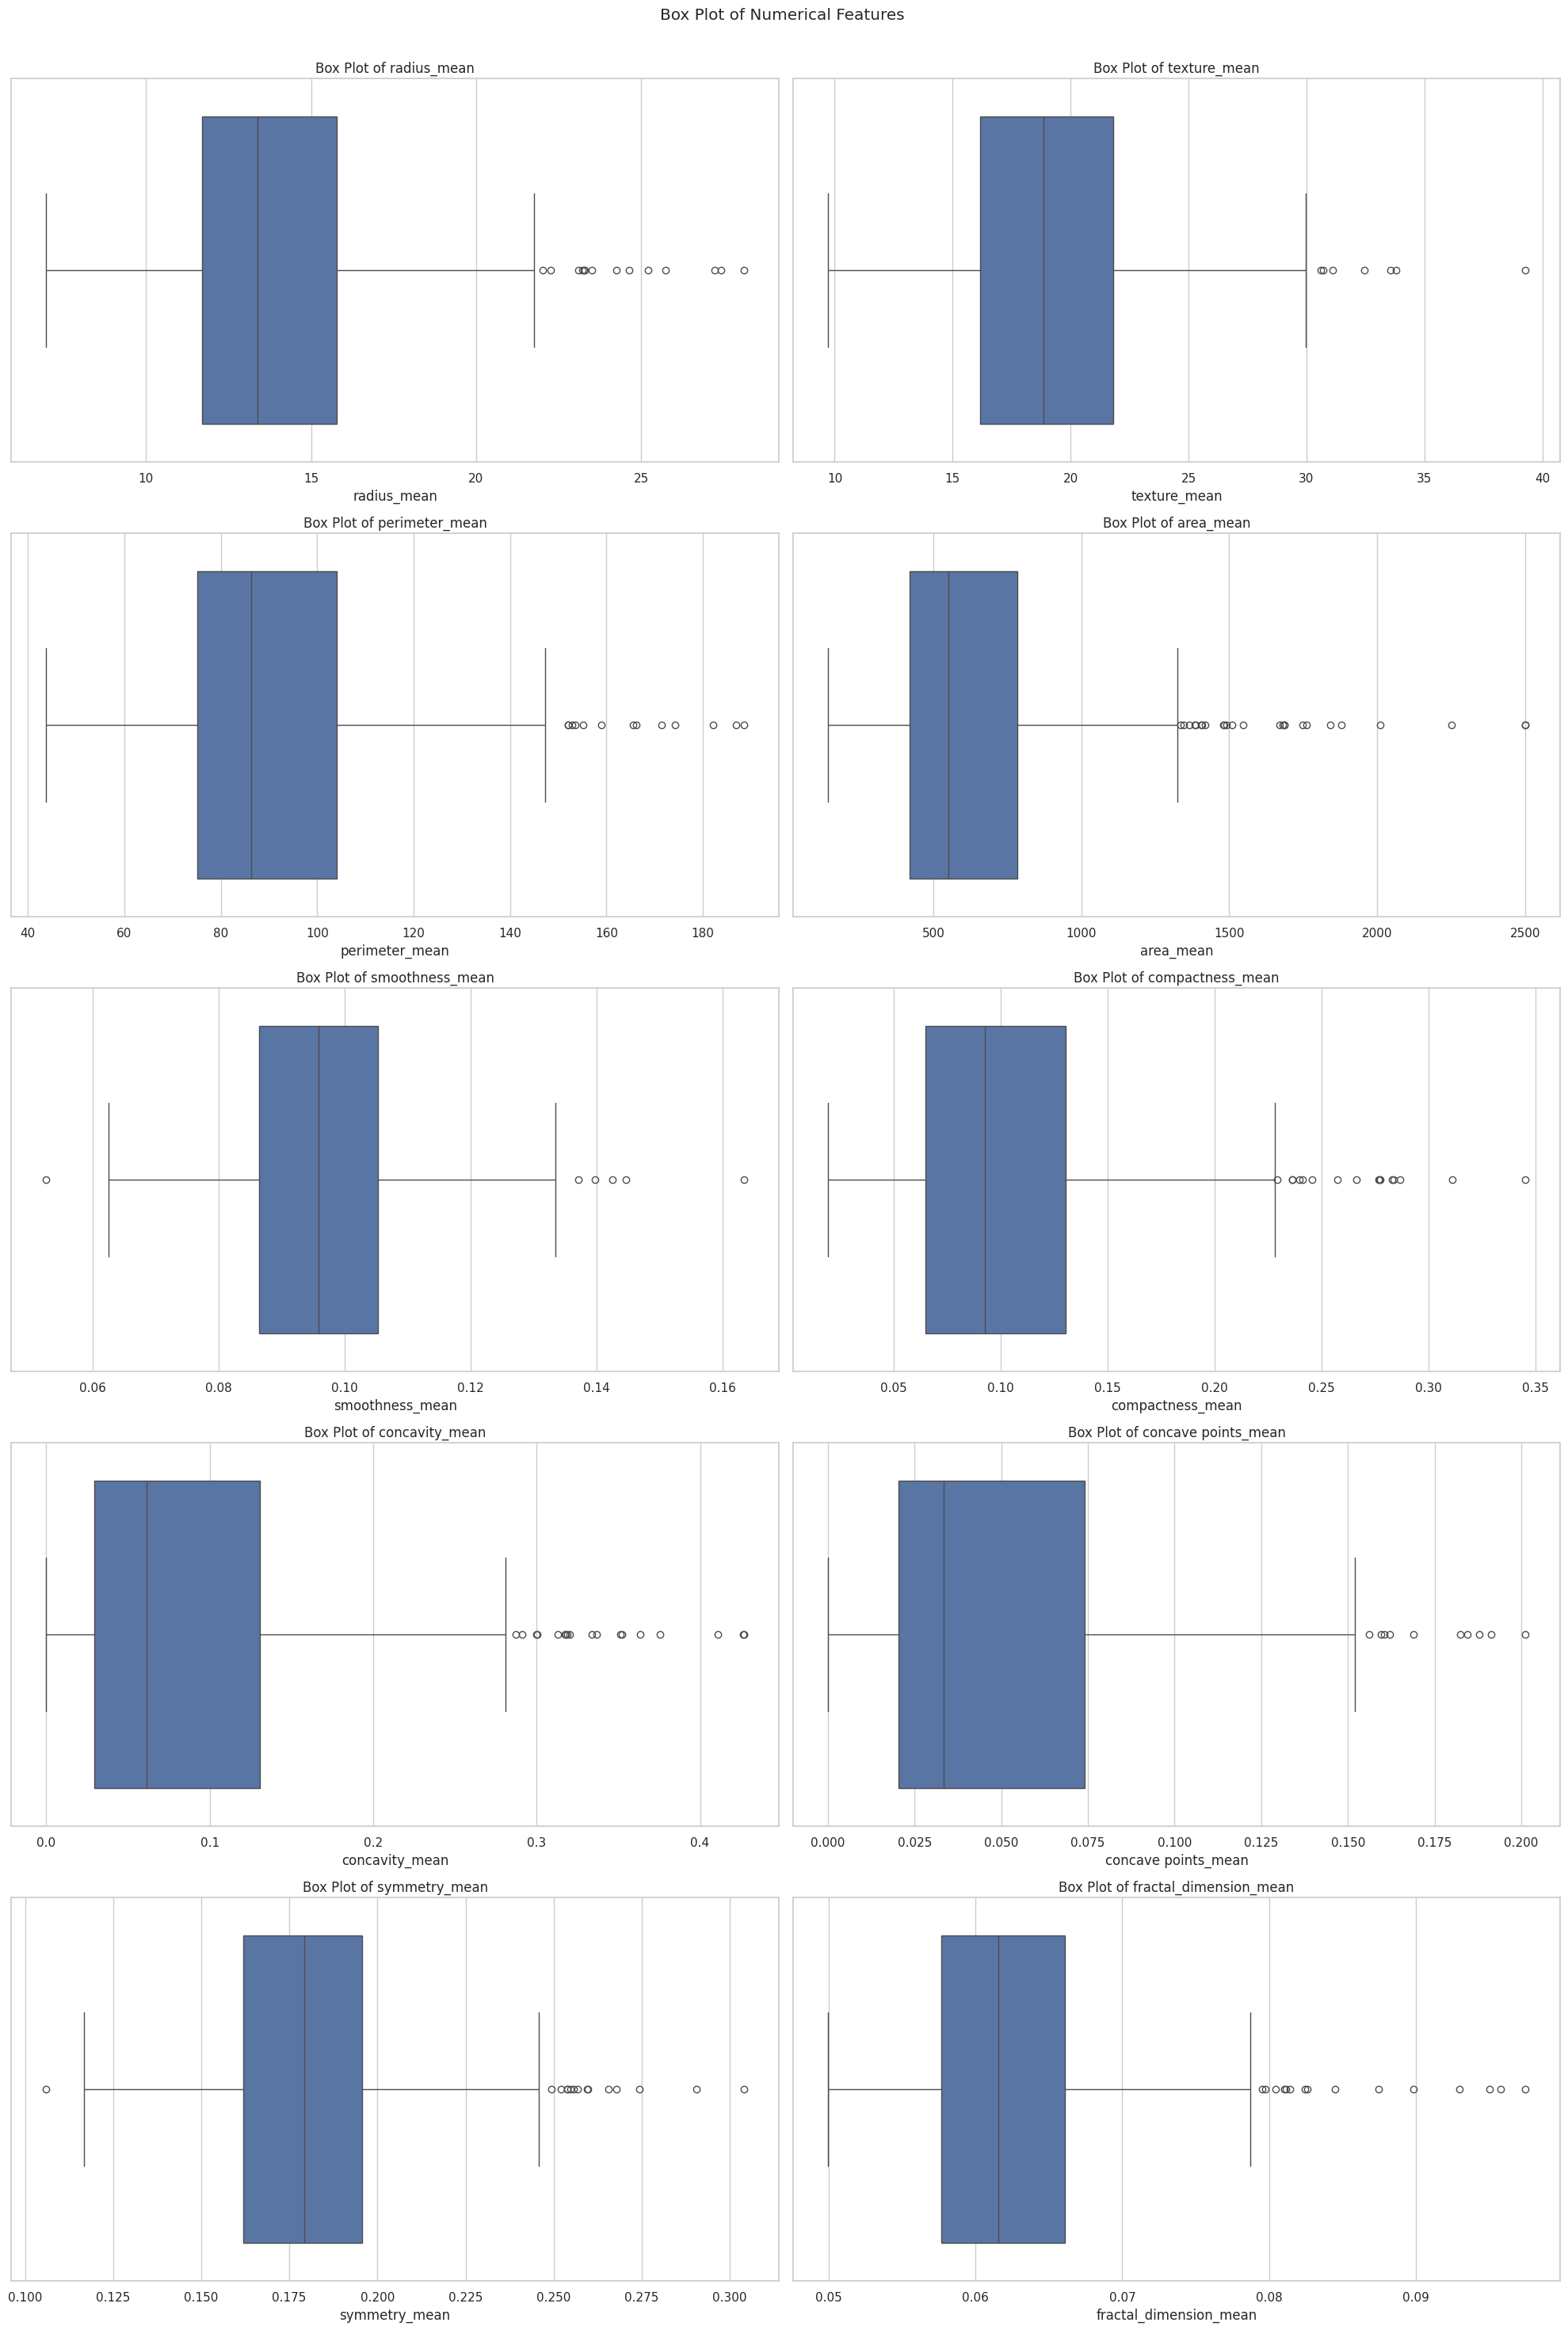

In [9]:
# This cell based on my AAI540 final project
# Check for Outliers
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
fig.suptitle('Box Plot of Numerical Features')

# Iterating over numerical columns
for col, ax in zip(numeric_cols, axes.flatten()):
    sns.boxplot(data=raw_data, x=col, ax=ax)
    ax.set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

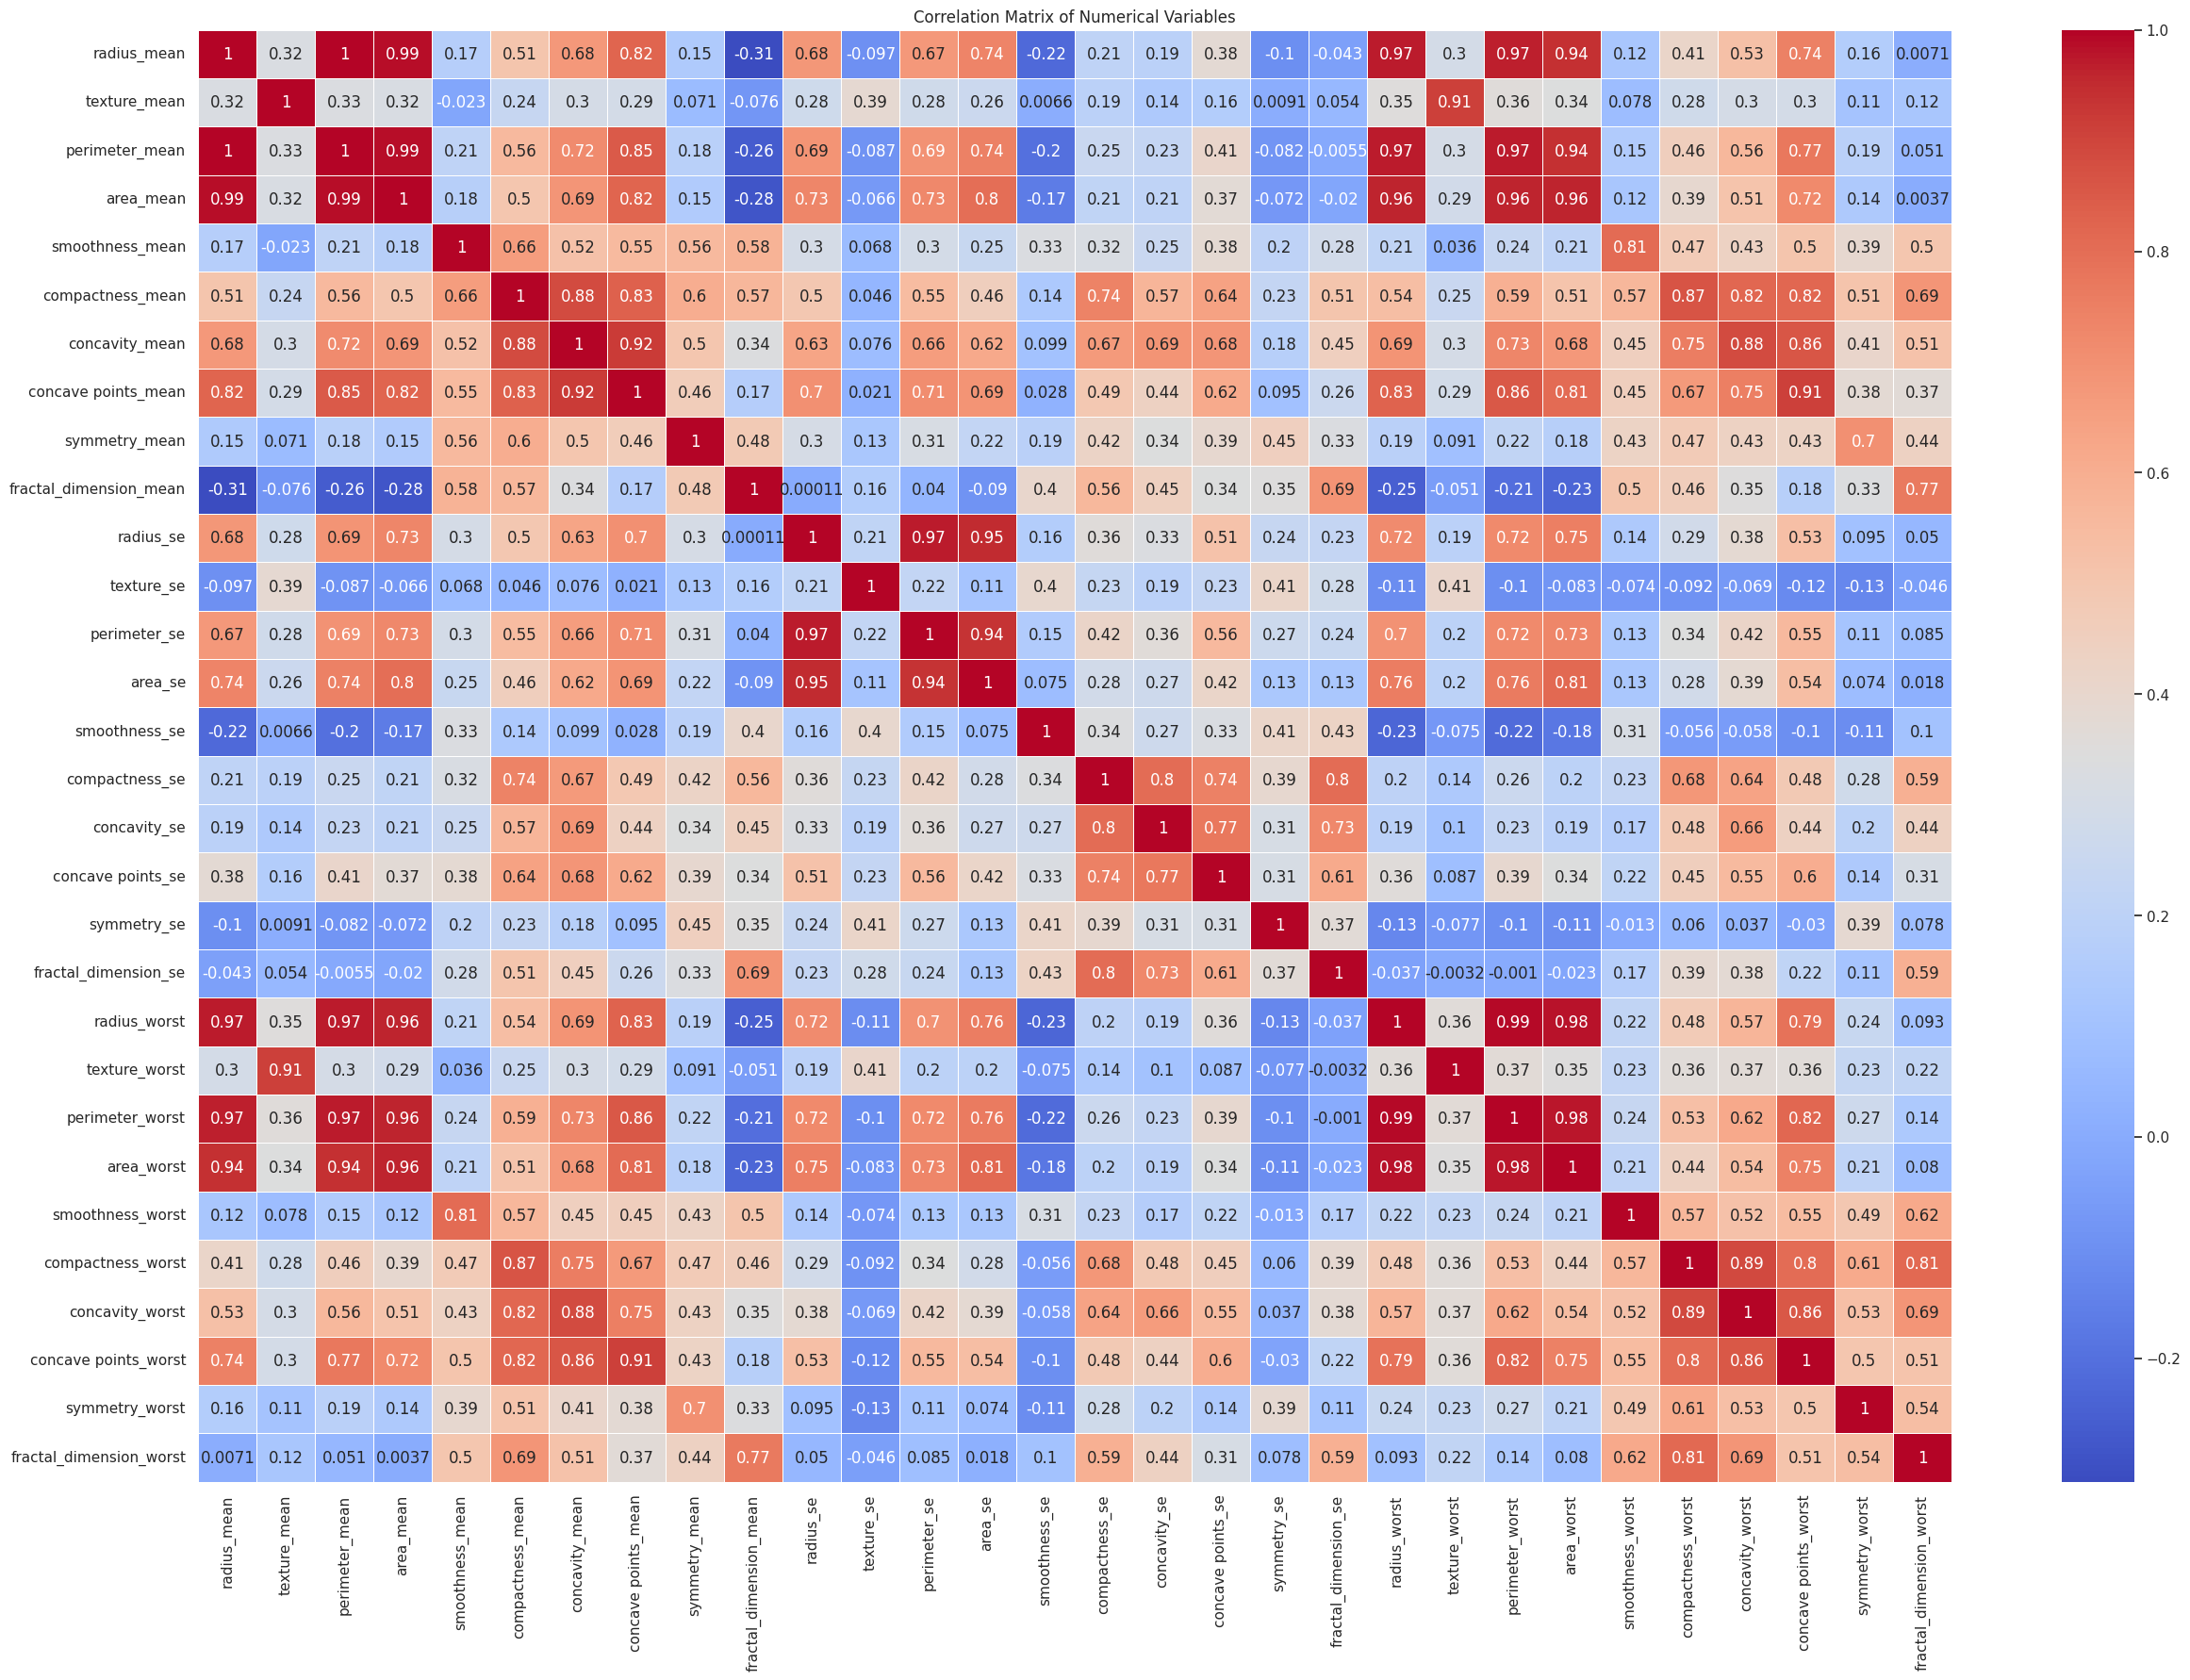

In [10]:
# based on AAI540 final project
# Correlation matrix & heatmap
correlation_matrix = raw_data[numeric_cols].corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Model Design and Building
Some of this code in this section is from or based on the following:

Pattanayak, S. (2021). Quantum Machine Learning with Python. New York, NY: Singer Science+Business Media.

### Sample quantum computing
Try out some examples to ensure the environment is setup correctly.

In [11]:
# Google's example- make sure the quantum simulation works
# https://quantumai.google/cirq/start/start

#import cirq

# Pick a qubit.
qubit = cirq.GridQubit(0, 0)

# Create a circuit
circuit = cirq.Circuit(
    cirq.X(qubit)**0.5,  # Square root of NOT.
    cirq.measure(qubit, key='m')  # Measurement.
)
print("Circuit:")
print(circuit)

# Simulate the circuit several times.
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=20)
print("Results:")
print(result)

Circuit:
(0, 0): ───X^0.5───M('m')───
Results:
m=01110100110001101101


### Normalize the data

In [12]:
# normalize the data
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns
normalized_data = pd.DataFrame(scaler.fit_transform(raw_data[numeric_cols]), columns=numeric_cols)
normalized_data[TARGET_COL_BINARY] = raw_data[TARGET_COL_BINARY]

# Display the first few rows of the normalized data
display(normalized_data.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_binary
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


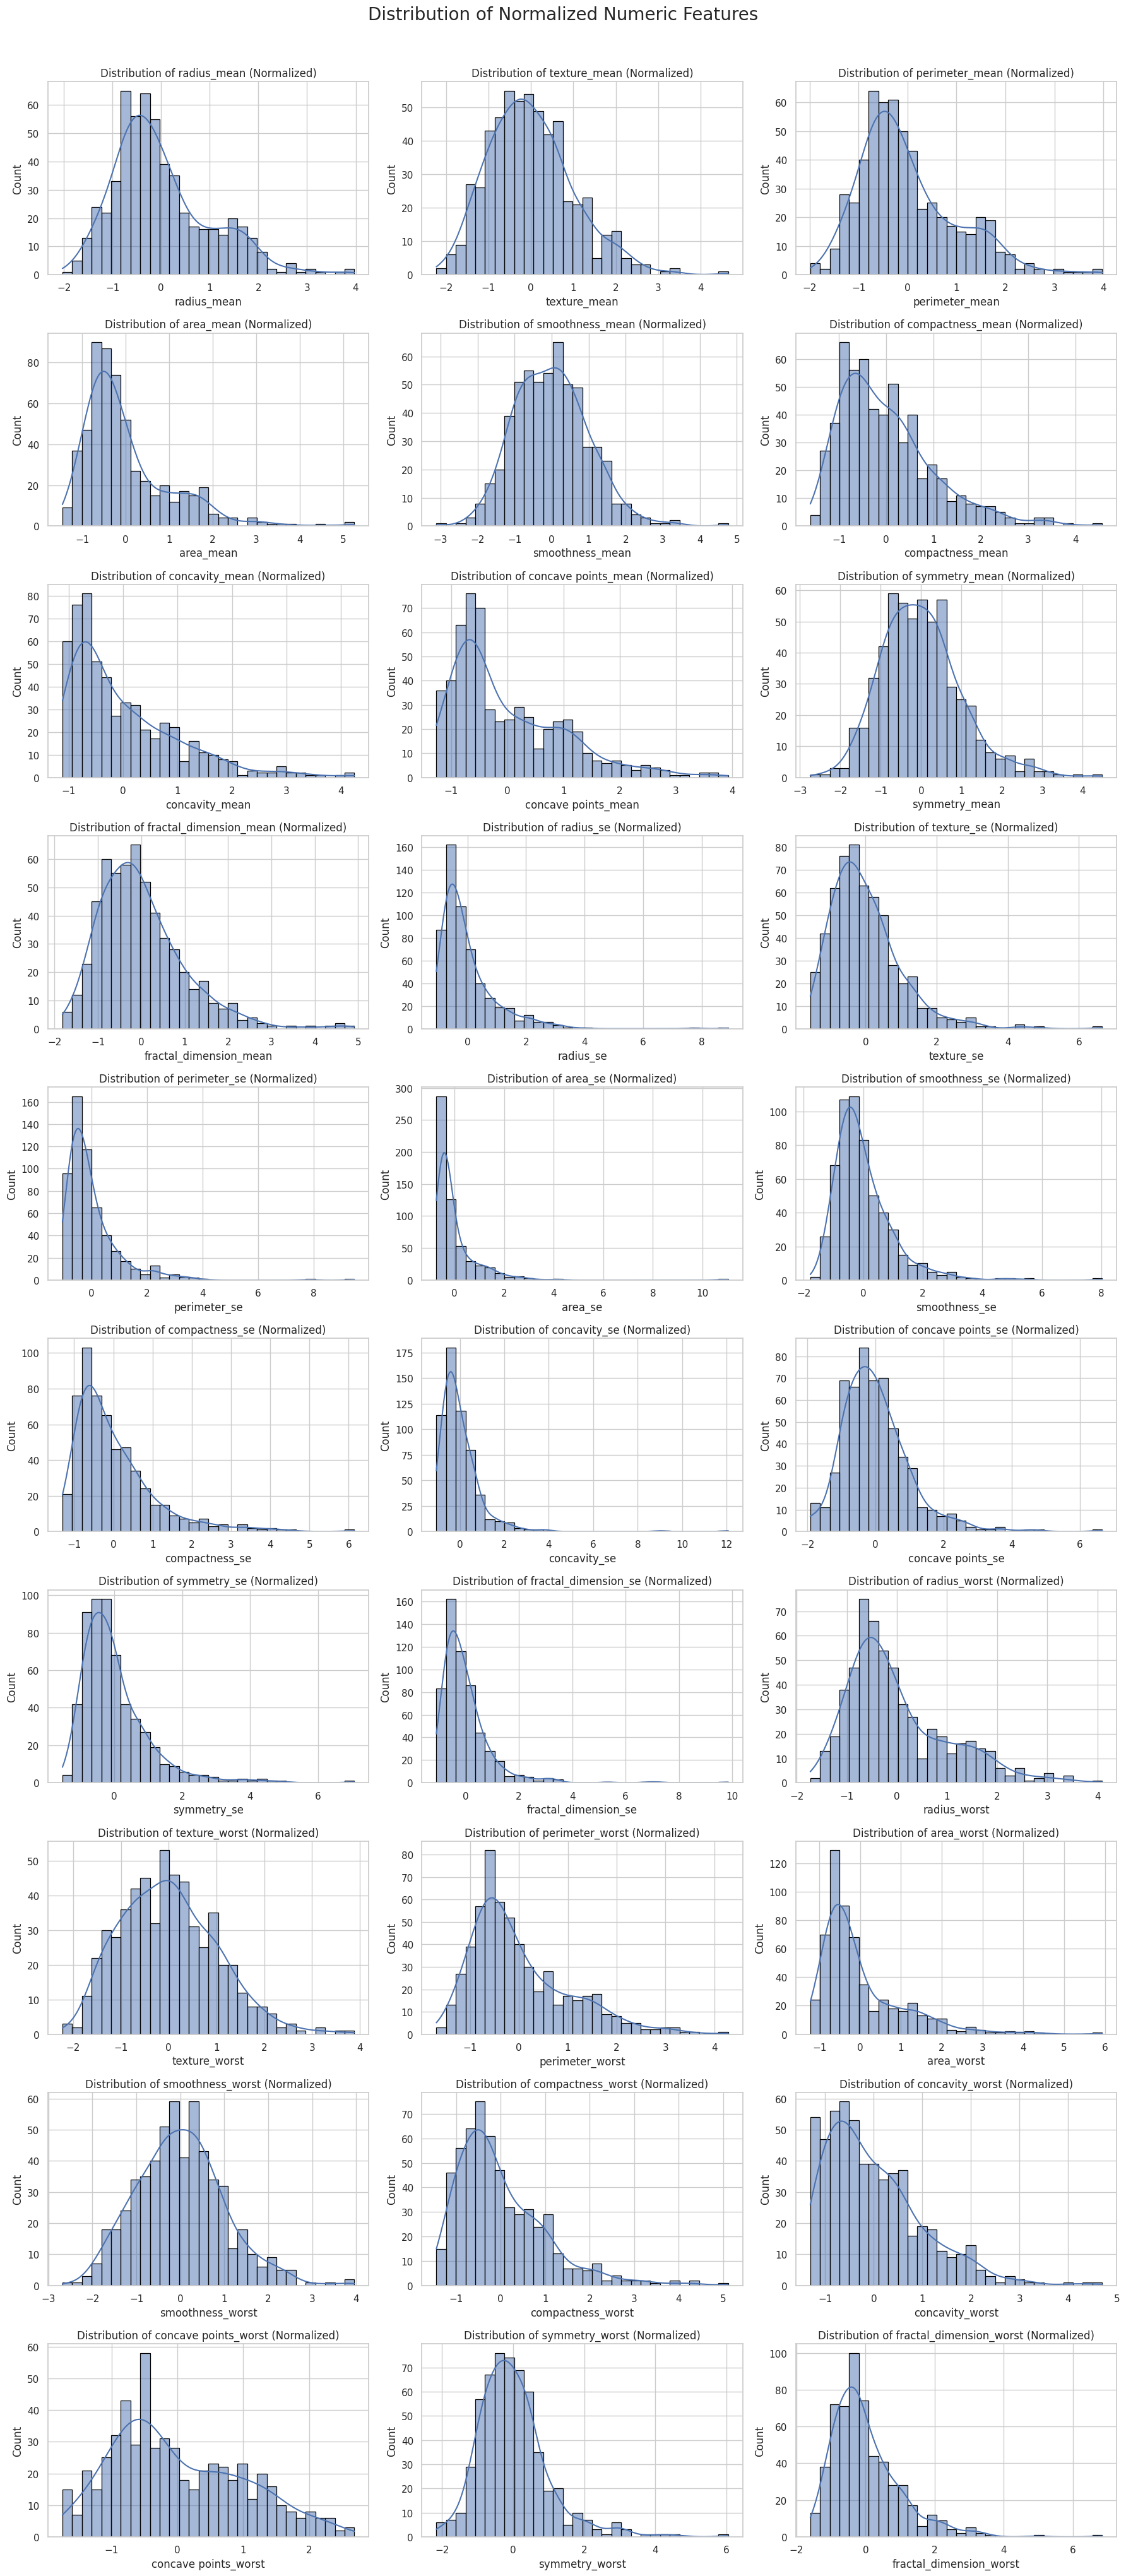

In [13]:
# prompt: How do I see the distribution of each column in normalized_data?

# Plot distributions for normalized data
sns.set(style="whitegrid")

# Set up the grid
num_plots = len(numeric_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)
fig, axes = plt.subplots(rows, 3, figsize=(18, 4 * rows))
axes = axes.flatten()

# Plot distributions
for i, col in enumerate(numeric_cols):
    sns.histplot(normalized_data[col], kde=True, ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {col} (Normalized)')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distribution of Normalized Numeric Features", fontsize=20, y=1.02)
plt.show()

In [14]:
# There are a limited number of qubits we can use, so let's do feature selection
# to narrow things down. Methodology: each type of data has 3 variant features,
# [x]_mean, [x]_se, [x]_worst
MEAN_FEATURES = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', \
                 'smoothness_mean', 'compactness_mean', 'concavity_mean', \
                 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

SE_FEATURES = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', \
               'smoothness_se', 'compactness_se', 'concavity_se', \
               'concave_points_se', 'symmetry_se', 'fractal_dimension_se']

WORST_FEATURES = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', \
                  'smoothness_worst', 'compactness_worst', 'concavity_worst', \
                  'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

## Setup for quantum neural network (QNN)
Steps:
 1. Feature selection
 2. Down sample < 0 to 0, >= 1 to 1
 3. Remove duplicates with conflicting targets
 4. Split into test and train
 5. Quantum feature map
 6. Setup the QNN

In [42]:
# narrow down the data set based on the selected features
def narrow_features(all_data = normalized_data, feature_column_names = MEAN_FEATURES, target_column_name = TARGET_COL_BINARY, debug = False):
  cur_data = all_data[feature_column_names + [target_column_name]].copy()
  if debug:
    print(cur_data.head())

  return cur_data

In [43]:
# prompt: I want to take each column in cur_data and transform the value to 0
# if it the value is < 0 and transform it to 1 if the value is >= 0.
def transform_to_binary(cur_data, target_column_name = TARGET_COL_BINARY, debug = False):
  # map all the features into 0 and 1
  feature_cols = [col for col in cur_data.columns if col != TARGET_COL_BINARY]
  for col in feature_cols:
    cur_data[col] = cur_data[col].apply(lambda x: 0 if x < 0 else 1)

  # map the target to -1 (0) and 1 (1) for the hinge loss function later
  cur_data[target_column_name] = cur_data[target_column_name].apply(lambda x: -1 if x == 0 else 1)

  if debug:
    print(cur_data.tail())

  return cur_data

In [44]:
# prompt: I want to drop any rows in cur_data that have all the same values
# for the columns in MEAN_FEATURES but have different values for TARGET_COL_BINARY

# Identify rows that have the same values for MEAN_FEATURES but different values for TARGET_COL_BINARY
# Group by the
def remove_duplicates(cur_data, feature_columns = MEAN_FEATURES, target_column_name = TARGET_COL_BINARY, debug = False):
  grouped = cur_data.groupby(feature_columns)

  # Filter groups that have more than one unique value in TARGET_COL_BINARY
  conflict_groups = grouped.filter(lambda x: x[target_column_name].nunique() > 1)

  # Get the indices of these rows
  conflict_indices = conflict_groups.index

  # Drop these rows from the original DataFrame
  cur_data_cleaned = cur_data.drop(conflict_indices)

  if debug:
    print(f"Original data shape: {cur_data.shape}")
    print(f"Rows dropped due to conflicting targets: {len(conflict_indices)}")
    print(f"Cleaned data shape: {cur_data_cleaned.shape}")
    print(f"Target counts: {cur_data_cleaned[target_column_name].value_counts()}")

  # Optional: Verify by checking if any remaining group has conflicting targets
  grouped_cleaned = cur_data_cleaned.groupby(feature_columns)
  conflict_groups_cleaned = grouped_cleaned.filter(lambda x: x[target_column_name].nunique() > 1)

  if debug:
    if not conflict_groups_cleaned.empty:
      print("\nWarning: Conflicting targets found in the cleaned data.")
    else:
      print("\nSuccessfully removed rows with conflicting targets for same feature values.")

  cur_data = cur_data_cleaned.copy() # Update cur_data to the cleaned version
  return cur_data

In [45]:
# split into test and train
TESTING_PERCENTAGE = 0.2
RANDOM_STATE = 42

def split_data(cur_data, feature_columns = MEAN_FEATURES, target_column_name = TARGET_COL_BINARY, testing_percentage = TESTING_PERCENTAGE, random_state = RANDOM_STATE):
  # Use random_state for reproducibility
  cur_data = cur_data.sample(frac=1, random_state=RANDOM_STATE)  # shuffle it
  X_train, X_test, y_train, y_test = train_test_split(cur_data[feature_columns], cur_data[target_column_name], test_size=testing_percentage, random_state=random_state)
  return X_train, X_test, y_train, y_test

In [46]:
# quantum feature mapping
def quantum_feature_map(x):
  qubits = cirq.GridQubit.rect(1, len(x))
  circuit = cirq.Circuit()
  for i, val in enumerate(x):
    if val:
      circuit.append(cirq.X(qubits[i]))
  return circuit

In [47]:
# next create the quantum data set by doing the quantum feature
# mapping for each row in cur_data
# Iterate over the index of the DataFrame instead of a range
def convert_data_to_quantum(X_train, X_test, y_train, y_test, feature_column_names = MEAN_FEATURES, debug = False):
  X_train_quantum = [quantum_feature_map(X_train.loc[i, feature_column_names]) for i in X_train.index]
  X_test_quantum = [quantum_feature_map(X_test.loc[i, feature_column_names]) for i in X_test.index]

  # Convert the lists of Cirq circuits to TensorFlow tensors
  X_train_quantum = tfq.convert_to_tensor(X_train_quantum)
  X_test_quantum = tfq.convert_to_tensor(X_test_quantum)

  # be sure to add in the target
  # Since quantum_data is a tensor, we cannot add a column like to a DataFrame.
  # We need to keep the target values separately, aligned with the quantum data.
  y_train_quantum = y_train.values
  y_test_quantum = y_test.values

  # let's take a look
  if debug:
    print("Snippet of X_train_quantum:", X_train_quantum[ : 5])
    print()
    print("Snippet of X_test_quantum:", X_test_quantum[ : 5])
    print()
    # Note: these should be mapped to -1 xor 1, not 0 xor 1.
    print("Snippet of y_train_quantum:", y_train_quantum[ : 5])
    print()
    print("Snippet of y_test_quantum:", y_test_quantum[ : 5])

  return X_train_quantum, X_test_quantum, y_train_quantum, y_test_quantum

** From the MNIST proof of concept and example **

In [48]:
class QuantumLayer():
  def __init__(self, data_qubits, readout):
    self.data_qubits = data_qubits
    self.readout = readout

  def add_layer(self, circuit, gate, prefix):
    for i, q in enumerate(self.data_qubits):
      _w_ = sympy.Symbol(prefix + '-' + str(i))
      circuit.append(gate(q, self.readout) ** _w_)

In [49]:
def create_QNN(num_features):
  """ Create a QNN model circuit and prediction(readout) """
  data_qubits = cirq.GridQubit.rect(1, num_features)
  readout = cirq.GridQubit(-1, 1)    # a single qubit at [-1, 1]
  circuit = cirq.Circuit()

  # prep the readout qubit
  circuit.append(cirq.X(readout))
  circuit.append(cirq.H(readout))

  builder = QuantumLayer(data_qubits = data_qubits, readout = readout)

  # apply a series of XX layers followed by a series
  # of ZZ layers
  builder.add_layer(circuit, cirq.XX, 'XX')
  builder.add_layer(circuit, cirq.ZZ, 'ZZ')

  # Hadamard gate on the readout qubit
  circuit.append(cirq.H(readout))

  return circuit, cirq.Z(readout)

In [50]:
def hinge_accuracy(y_true, y_pred):
  y_true = tf.squeeze(y_true) > 0.0
  y_pred = tf.squeeze(y_pred) > 0.0
  cost = tf.cast(y_true == y_pred, tf.float32)

  return tf.reduce_mean(cost)

In [51]:
def build_model(num_features):
  model_circuit, model_readout = create_QNN(num_features)
  model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(), dtype=tf.string),
      tfq.layers.PQC(model_circuit, model_readout),
  ])
  return model, model_circuit, model_readout


In [52]:
def compile_model(feature_column_names = MEAN_FEATURES, debug = False):
  model, model_circuit, model_readout = build_model(len(MEAN_FEATURES))
  model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[hinge_accuracy]
  )

  if debug:
    print("Circuit:")
    print(model_circuit)
    print()
    print("Readout Qubit:")
    print(model_readout)
    print()
    print(model.summary())

  return model

In [53]:
# Plot loss and accuracy over epochs
def plot_loss_and_accuracy(qnn_hist):
  plt.figure(figsize=(12, 6))

  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(qnn_hist.history['loss'], label='Training Loss')
  plt.plot(qnn_hist.history['val_loss'], label='Validation Loss')
  plt.title('Loss Over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(qnn_hist.history['hinge_accuracy'], label='Training Accuracy')
  plt.plot(qnn_hist.history['val_hinge_accuracy'], label='Validation Accuracy')
  plt.title('Accuracy Over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

## Model Training
This is training the model, primarily based off the MNIST example. After this, different variations will be tried to see if they improve performance.

In [54]:
# setup all the data and model

# feature selection
cur_data = narrow_features(all_data = normalized_data, feature_column_names = MEAN_FEATURES, target_column_name = TARGET_COL_BINARY, debug = True)

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  diagnosis_binary  
0                2.255747                 1  


In [55]:
# feature transformation
cur_data = transform_to_binary(cur_data = cur_data, target_column_name = TARGET_COL_BINARY, debug = True)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
564            1             1               1          1                1   
565            1             1               1          1                1   
566            1             1               1          1                0   
567            1             1               1          1                1   
568            0             1               0          0                0   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
564                 1               1                    1              0   
565                 0               1                    1              0   
566                 0               1                    1              0   
567                 1               1                    1              1   
568                 0               0                    0              0   

     fractal_dimension_mean  diagnosis_binary  
564                 

In [56]:
# remove duplicates after narrowing and transformation
cur_data = remove_duplicates(cur_data, feature_columns = MEAN_FEATURES, target_column_name = TARGET_COL_BINARY, debug = True)

Original data shape: (569, 11)
Rows dropped due to conflicting targets: 134
Cleaned data shape: (435, 11)
Target counts: diagnosis_binary
-1    271
 1    164
Name: count, dtype: int64

Successfully removed rows with conflicting targets for same feature values.


In [57]:
# split into test and train
X_train, X_test, y_train, y_test = split_data(cur_data, feature_columns = MEAN_FEATURES, target_column_name = TARGET_COL_BINARY, testing_percentage = TESTING_PERCENTAGE, random_state = RANDOM_STATE)

In [58]:
# convert into quantum data
X_train_quantum, X_test_quantum, y_train_quantum, y_test_quantum = convert_data_to_quantum(X_train, \
                                                                                           X_test, \
                                                                                           y_train, \
                                                                                           y_test, \
                                                                                           feature_column_names = MEAN_FEATURES, \
                                                                                           debug = True)

Snippet of X_train_quantum: tf.Tensor(
[b'\n\x0e\n\x0ctfq_gate_set\x12\xd5\x08\x08\x01\x12\xd0\x08\n\x87\x01\n\x04\n\x02XP\x12\x16\n\x0econtrol_qubits\x12\x04\n\x02\x1a\x00\x12\x1a\n\x0fexponent_scalar\x12\x07\n\x05\r\x00\x00\x80?\x12\x16\n\x0econtrol_values\x12\x04\n\x02\x1a\x00\x12\x13\n\x08exponent\x12\x07\n\x05\r\x00\x00\x80?\x12\x17\n\x0cglobal_shift\x12\x07\n\x05\r\x00\x00\x00\x00\x1a\x05\x12\x030_0\n\x87\x01\n\x04\n\x02XP\x12\x16\n\x0econtrol_qubits\x12\x04\n\x02\x1a\x00\x12\x1a\n\x0fexponent_scalar\x12\x07\n\x05\r\x00\x00\x80?\x12\x16\n\x0econtrol_values\x12\x04\n\x02\x1a\x00\x12\x13\n\x08exponent\x12\x07\n\x05\r\x00\x00\x80?\x12\x17\n\x0cglobal_shift\x12\x07\n\x05\r\x00\x00\x00\x00\x1a\x05\x12\x030_1\n\x87\x01\n\x04\n\x02XP\x12\x16\n\x0econtrol_qubits\x12\x04\n\x02\x1a\x00\x12\x1a\n\x0fexponent_scalar\x12\x07\n\x05\r\x00\x00\x80?\x12\x16\n\x0econtrol_values\x12\x04\n\x02\x1a\x00\x12\x13\n\x08exponent\x12\x07\n\x05\r\x00\x00\x80?\x12\x17\n\x0cglobal_shift\x12\x07\n\x05\r\x00\x0

In [59]:
# finally, put together the model
model = compile_model(feature_column_names = MEAN_FEATURES, debug = True)

Circuit:
(-1, 1): ───X───H───XX──────────XX──────────XX──────────XX──────────XX──────────XX──────────XX──────────XX──────────XX──────────XX──────────ZZ──────────ZZ──────────ZZ──────────ZZ──────────ZZ──────────ZZ──────────ZZ──────────ZZ──────────ZZ──────────ZZ──────────H───
                    │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │           │
(0, 0): ────────────XX^(XX-0)───┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────ZZ^(ZZ-0)───┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────────
                                │           │           │           │           │           │           │           │           │                       │           │           │           │           │          

/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [60]:
BATCH_SIZE = 16
NUM_EPOCHS = 20
VERBOSE = 1

qnn_hist = model.fit(
    X_train_quantum, y_train_quantum,
    validation_data=(X_test_quantum, y_test_quantum),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=VERBOSE
)

results = model.evaluate(X_test_quantum, y_test_quantum)
print(results)
print()
print("Final test loss: {:.4f}".format(results[0]))
print("Final test accuracy: {:.4f}".format(results[1]))

Epoch 1/20
22/22 [==============================] - 2s 63ms/step - loss: 1.0552 - hinge_accuracy: 0.4356 - val_loss: 1.0644 - val_hinge_accuracy: 0.3780
Epoch 2/20
22/22 [==============================] - 1s 44ms/step - loss: 1.0392 - hinge_accuracy: 0.4460 - val_loss: 1.0497 - val_hinge_accuracy: 0.4092
Epoch 3/20
22/22 [==============================] - 1s 47ms/step - loss: 1.0245 - hinge_accuracy: 0.4688 - val_loss: 1.0343 - val_hinge_accuracy: 0.3988
Epoch 4/20
22/22 [==============================] - 1s 49ms/step - loss: 1.0117 - hinge_accuracy: 0.5284 - val_loss: 1.0164 - val_hinge_accuracy: 0.4777
Epoch 5/20
22/22 [==============================] - 1s 61ms/step - loss: 0.9990 - hinge_accuracy: 0.5417 - val_loss: 1.0011 - val_hinge_accuracy: 0.4673
Epoch 6/20
22/22 [==============================] - 2s 73ms/step - loss: 0.9883 - hinge_accuracy: 0.5038 - val_loss: 0.9892 - val_hinge_accuracy: 0.5015
Epoch 7/20
22/22 [==============================] - 1s 64ms/step - loss: 0.9802 - 

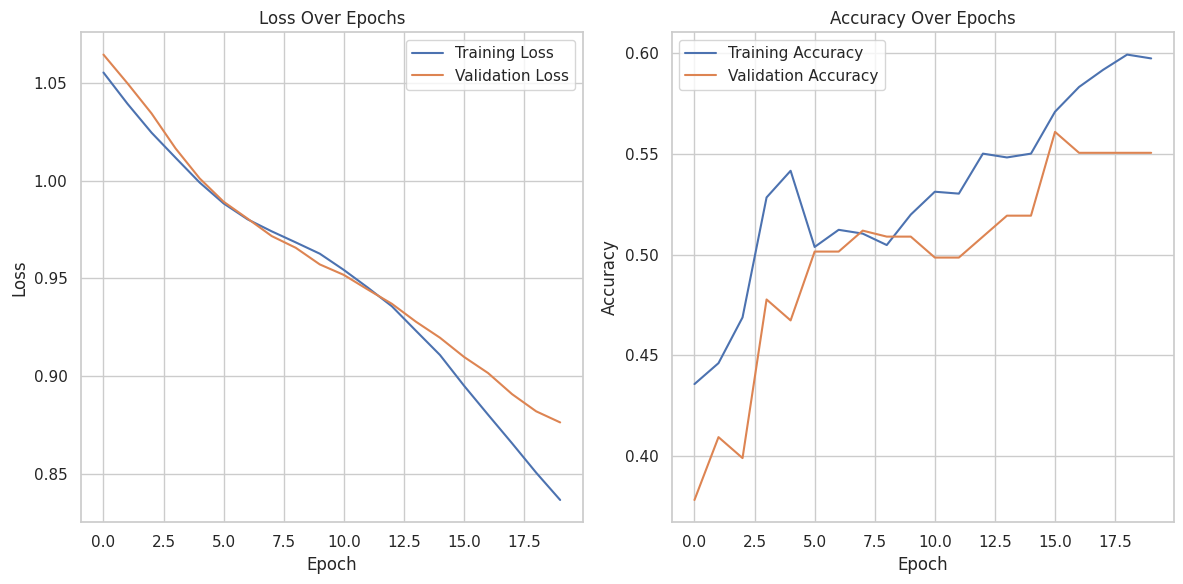

In [61]:
plot_loss_and_accuracy(qnn_hist)

Note the distribution, from above:
```
Target counts: diagnosis_binary
-1    271
 1    164
Name: count, dtype: int64
```
That breaks down to 62.3% for -1 (not cancer) and 37.7% for 1 (cancer).

## Model Optimization

There are several areas to try to optomize performance, as the original above isn't really performant. Those are:
 1. Different feature selection.
 2. Different feature engineering, as the above slots each feature value into a binary 0 or 1.
 3. Different quantum feature mapping.
 4. A different (deeper?) quantum neural network.

 In order to make the code easier to read, any new or derived functions utlized to atttempt model optimization are contained in the cells below.

## Model Analysis

## Additional details

### Feature definitions
Additional details on the features, from the [source](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/discussion/528138).

 * id: A unique identifier for each tumor record.

 * diagnosis: The diagnosis of the tumor, where M stands for malignant and B stands for benign.

 * radius_mean: The mean of the distances from the center of the tumor to the perimeter. It reflects the average size of the tumor.
 * texture_mean: The mean of the standard deviation of gray-scale values in the tumor image. It measures the smoothness or coarseness of the tumor's texture.
 * perimeter_mean: The mean of the perimeter lengths of the tumor's boundary. It reflects the average circumference of the tumor.
 * area_mean: The mean of the area occupied by the tumor. It represents the average size of the tumor's surface area.
 * smoothness_mean: The mean of local variation in radius lengths, measuring how smooth the tumor's surface is.
 * compactness_mean: The mean of the compactness of the tumor. It indicates how compact or round the tumor is.
 * concavity_mean: The mean of the severity of concave portions of the tumor's boundary. It reflects the degree of inward curving of the tumor's edges.
 * concave points_mean: The mean of the number of concave portions of the tumor's boundary. It counts the number of indentations or concave points on the tumor's edge.
 * symmetry_mean: The mean of the symmetry of the tumor. It measures how symmetrical the tumor is about its center.
 * fractal_dimension_mean: The mean of the fractal dimension, reflecting how detailed the tumor's surface is.

 * radius_se: The standard error of the radius measurement.
 * texture_se: The standard error of the texture measurement.
 * perimeter_se: The standard error of the perimeter measurement.
 * area_se: The standard error of the area measurement.
 * smoothness_se: The standard error of the smoothness measurement.
 * compactness_se: The standard error of the compactness measurement.
 * concavity_se: The standard error of the concavity measurement.
 * concave points_se: The standard error of the concave points measurement.
 * symmetry_se: The standard error of the symmetry measurement.
 * fractal_dimension_se: The standard error of the fractal dimension measurement.

 * radius_worst: The worst (largest) value of the radius measurements across all the samples.
 * texture_worst: The worst (largest) value of the texture measurements across all the samples.
 * perimeter_worst: The worst (largest) value of the perimeter measurements across all the samples.
 * area_worst: The worst (largest) value of the area measurements across all the samples.
 * smoothness_worst: The worst (largest) value of the smoothness measurements across all the samples.
 * compactness_worst: The worst (largest) value of the compactness measurements across all the samples.
 * concavity_worst: The worst (largest) value of the concavity measurements across all the samples.
 * concave points_worst: The worst (largest) value of the concave points measurements across all the samples.
 * symmetry_worst: The worst (largest) value of the symmetry measurements across all the samples.
 * fractal_dimension_worst: The worst (largest) value of the fractal dimension measurements across all the samples.